**Movie Data EDA & Visualization**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('movies.csv') #loaddataset

In [23]:
df.info() # info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie         107 non-null    object 
 1   Genre         107 non-null    object 
 2   Rating        107 non-null    float64
 3   Revenue ($M)  107 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.5+ KB


In [24]:
df.head() # show first 5 rows

,Movie,Genre,Rating,Revenue ($M)
0,Avatar,Comedy,7.2,2292
1,Inception,Action,8.2,441
2,Titanic,Animation,8.9,1206
3,Joker,Comedy,8.4,1815
4,Avengers: Endgame,Comedy,6.5,526


In [25]:
print("Rows & Columns:", df.shape)

Rows & Columns: (107, 4)


In [26]:
# summary stat
df.describe()

,Rating,Revenue ($M)
count,107.000000,107.000000
mean,7.702804,1537.084112
std,1.018180,823.348675
min,6.100000,101.000000
25%,6.950000,1021.000000
50%,7.700000,1480.000000
75%,8.500000,2313.000000
max,9.500000,2942.000000


In [36]:
#check null values

df.isnull()

,Movie,Genre,Rating,Revenue ($M)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False
105,False,False,False,False


In [37]:
df.isnull().sum()

,0
Movie,0
Genre,0
Rating,0
Revenue ($M),0


In [38]:
df['Genre'].unique() # checking unique value

array(['Comedy', 'Action', 'Animation', 'Romance', 'Thriller', 'Drama',
       'Sci-Fi'], dtype=object)

In [33]:
df.duplicated().sum() # checkin gduplicated value

np.int64(0)

In [40]:
# Top 10 movie by revenue

In [43]:
top10= df.sort_values(by='Revenue ($M)', ascending=False)

In [46]:
top10

,Movie,Genre,Rating,Revenue ($M)
61,Mission Impossible,Animation,8.2,2942
23,The Incredibles,Action,8.5,2893
106,Inglourious Basterds,Thriller,7.6,2857
5,Frozen,Romance,8.0,2828
25,Deadpool,Thriller,6.2,2776
...,...,...,...,...
87,Rampage,Comedy,7.5,175
20,Up,Comedy,6.2,162
26,Logan,Sci-Fi,6.1,125
14,The Batman,Drama,6.9,124


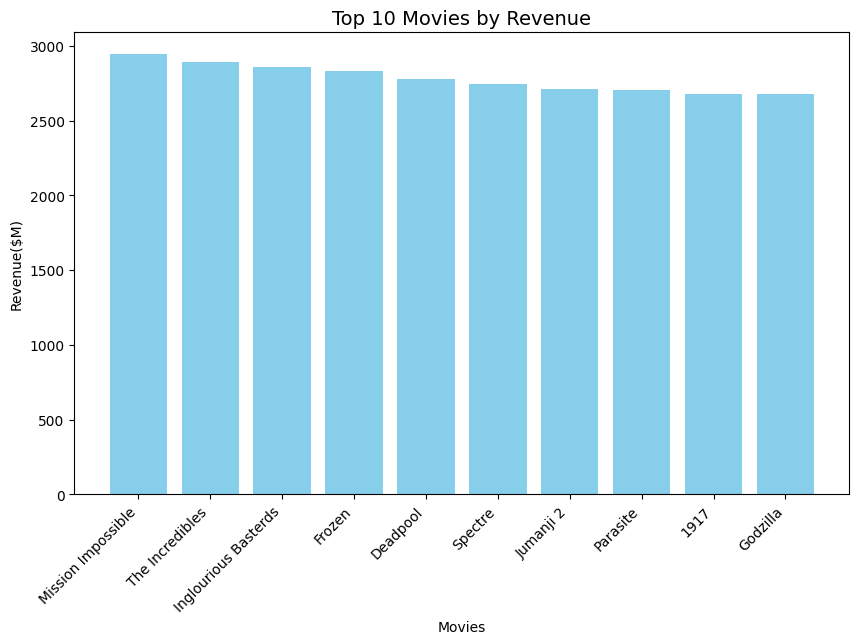

In [53]:
plt.figure(figsize=(10,6))
plt.bar(top10['Movie'], top10['Revenue ($M)'], color='skyblue')
plt.title('Top 10 Movies by Revenue', fontsize=14)
plt.xlabel('Movies')
plt.ylabel('Revenue($M)')
plt.xticks(rotation=45, ha='right')
plt.show()

**Top 10 Movies by Revenue**

All movies earned $2700M–$2900M.

Revenue is very similar across all top 10.

In [54]:
# Distribution of Rating

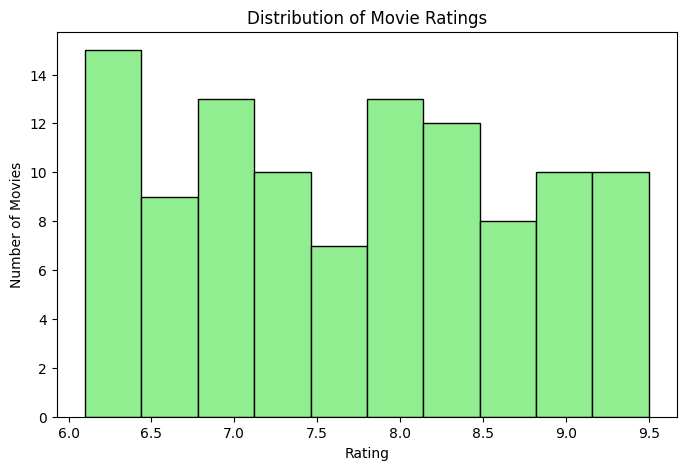

In [55]:
plt.figure(figsize=(8,5))
plt.hist(df['Rating'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


**Distribution of Movie Ratings**

Most movies are rated between 6.0 and 7.5.

6.0–6.5 is the most common rating range.

Revenue Comparison (Genre-wise Pie Chart)

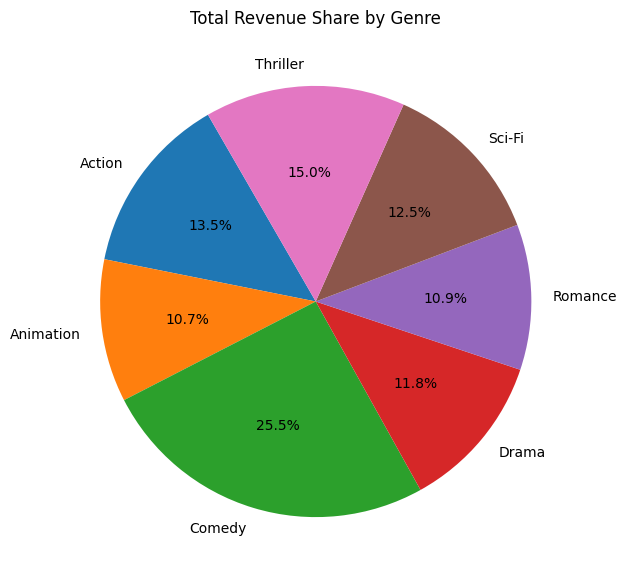

In [56]:
plt.figure(figsize=(7,7))
genre_revenue = df.groupby('Genre')['Revenue ($M)'].sum()
plt.pie(genre_revenue, labels=genre_revenue.index, autopct='%1.1f%%', startangle=120)
plt.title('Total Revenue Share by Genre')
plt.show()


**Total Revenue Share by Genre**

Comedy has the biggest revenue share (25.5%).

Other genres like Thriller, Action, and Sci-Fi follow with smaller shares.

**Average Revenue by** **Genre**

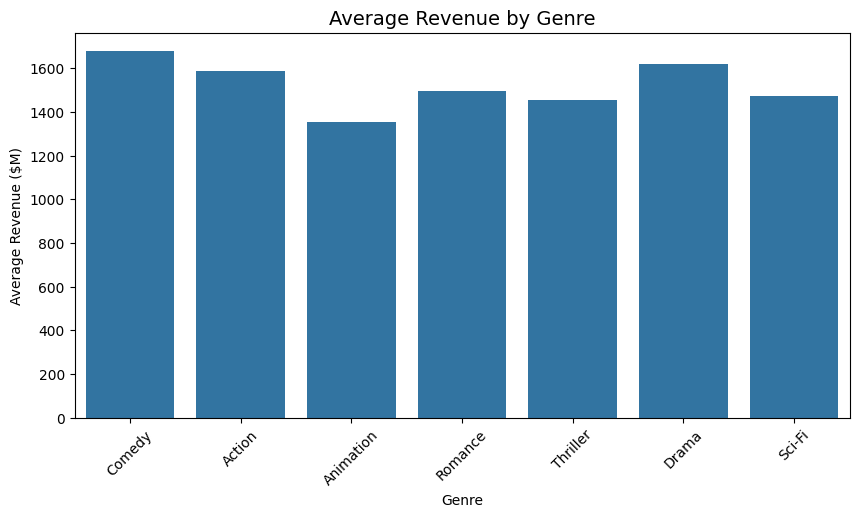

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Revenue ($M)', data=df, estimator='mean', errorbar=None)
plt.title('Average Revenue by Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Average Revenue ($M)')
plt.xticks(rotation=45)
plt.show()


**Average Revenue by Genre**

Comedy makes the most money on average.

Animation earns the least.

**Rating vs Revenue**

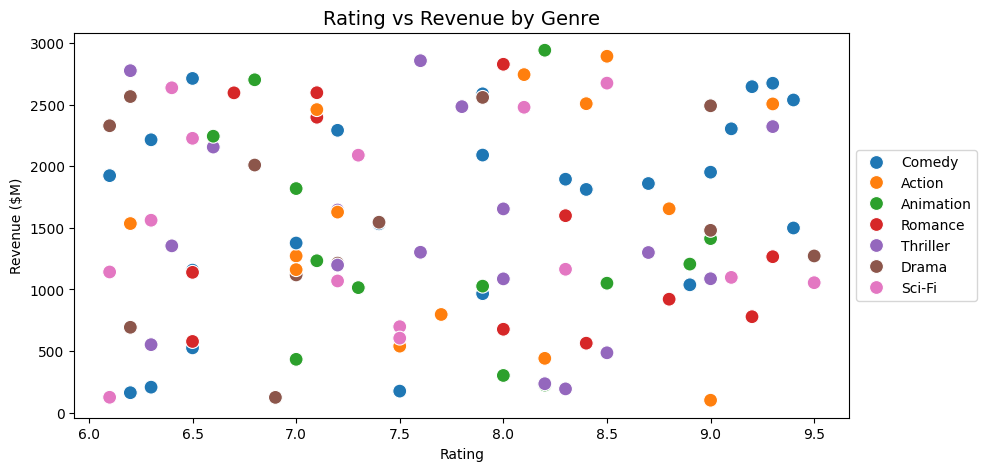

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Rating', y='Revenue ($M)', hue='Genre', data=df, s=100)
plt.title('Rating vs Revenue by Genre', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Revenue ($M)')
plt.legend(loc= 'center left', bbox_to_anchor=(1, 0.5))
plt.show()


**Rating vs Revenue (Scatter Plot)**

High ratings don’t guarantee high revenue.

Comedy and Action movies earn well across all ratings.

**Correlation Heatmap**

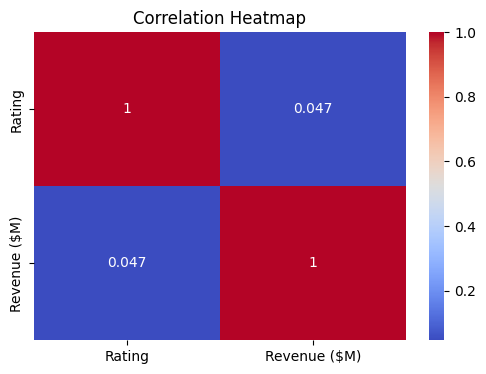

In [60]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Rating','Revenue ($M)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Correlation Heatmap**

Rating and revenue are barely related.

A good rating doesn’t mean big earnings.

**📌 Conclusion**

Comedy emerges as the most profitable genre, both in total and average revenue, while ratings show little influence on financial success. Most movies cluster around mid-range ratings, and there's almost no correlation between how well a movie is rated and how much money it makes. Genre appeal and market reach seem to drive revenue more than critical acclaim.

**✅ Key Findings**

1. Comedy leads in both total revenue share (25.5%) and average revenue (over
$1600M).

2. Animation has the lowest average revenue despite its popularity.

3. Top 10 movies all earned between $2700M–$2900M, showing tight competition.

4. Most movie ratings fall between 6.0 and 7.5, with 6.0–6.5 being the most common.

5. Rating vs Revenue scatter plot shows no clear pattern—high ratings don’t guarantee high earnings.

6. Correlation heatmap confirms a very weak link (0.047) between rating and revenue.

